In [13]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import itertools

In [14]:
#Function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='YlOrRd'):
      
    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(20,10),)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

In [15]:
#importing dataset
data="E:\snu\SEM 6\APPLIED ML\PROJECT\EED363_1710110400_YATHARTH\Data\clean_data.csv"
clean_data=pd.read_csv(data)
clean_data = clean_data.drop(['Unnamed','Unnamed: 0','Unnamed: 0.1'], axis=1)
X=clean_data.iloc[:,5:11]
Y=clean_data.iloc[:,0]
activities=["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [17]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=421200/1280900,random_state=0)

In [18]:
#fitting KNN
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
#predicting training set results and thus finding accuracy
y_pred_train=classifier.predict(X_train)

<Figure size 432x288 with 0 Axes>

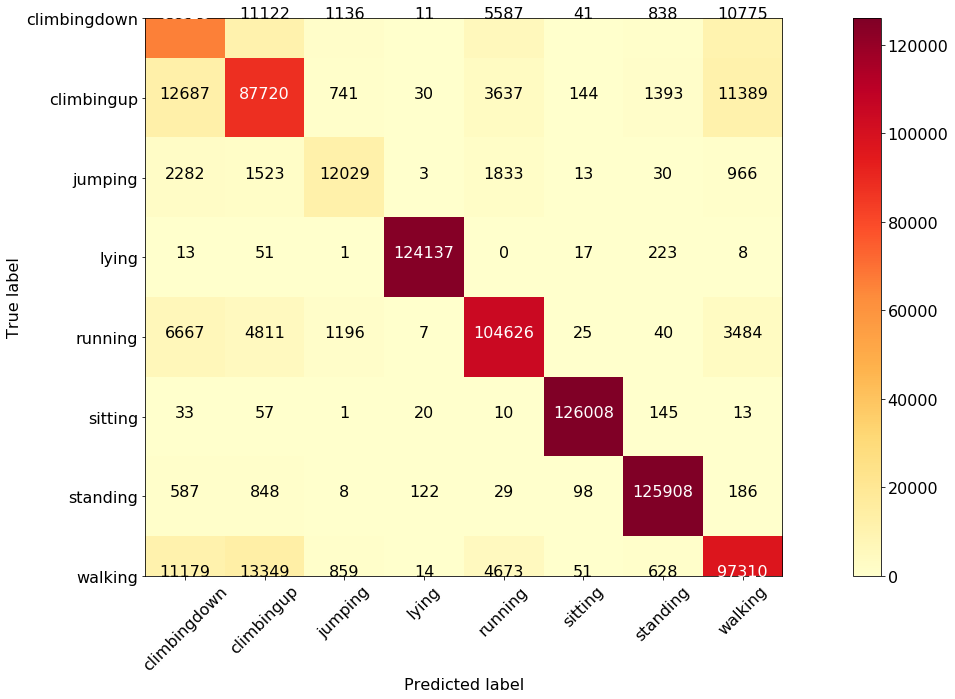

In [20]:
#Making confusion matrix
cm_train=confusion_matrix(Y_train,y_pred_train)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_train, 
                      classes=activities,
                      title='');

In [21]:
print(classification_report(Y_train, y_pred_train))
print(f'Training acc score is: {accuracy_score(Y_train,y_pred_train)*100:.3f}')

              precision    recall  f1-score   support

           0       0.66      0.69      0.68     95838
           1       0.73      0.75      0.74    117741
           2       0.75      0.64      0.69     18679
           3       1.00      1.00      1.00    124450
           4       0.87      0.87      0.87    120856
           5       1.00      1.00      1.00    126287
           6       0.97      0.99      0.98    127786
           7       0.78      0.76      0.77    128063

    accuracy                           0.87    859700
   macro avg       0.85      0.84      0.84    859700
weighted avg       0.87      0.87      0.87    859700

Training acc score is: 86.549


In [22]:
#predicting test set results and thus finding accuracy
y_pred_test=classifier.predict(X_test) 

<Figure size 432x288 with 0 Axes>

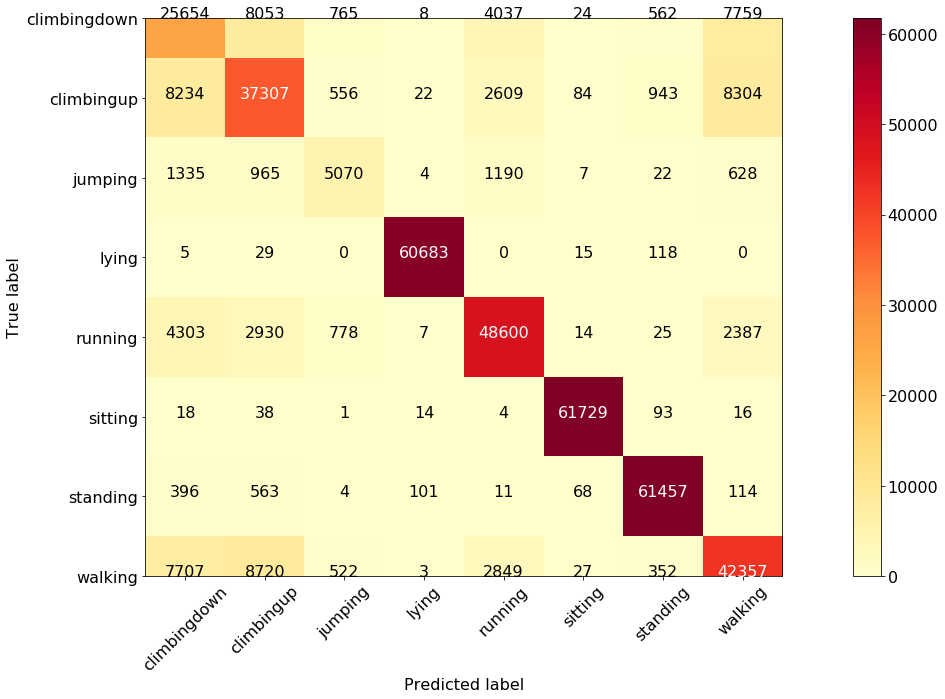

In [23]:
#Making Confusion Matrix
cm_test=confusion_matrix(Y_test,y_pred_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_test, 
                      classes=activities,
                      title='');

In [24]:
print(classification_report(Y_test, y_pred_test))
print(f'Test acc score is: {accuracy_score(Y_test,y_pred_test)*100:.3f}')

              precision    recall  f1-score   support

           0       0.54      0.55      0.54     46862
           1       0.64      0.64      0.64     58059
           2       0.66      0.55      0.60      9221
           3       1.00      1.00      1.00     60850
           4       0.82      0.82      0.82     59044
           5       1.00      1.00      1.00     61913
           6       0.97      0.98      0.97     62714
           7       0.69      0.68      0.68     62537

    accuracy                           0.81    421200
   macro avg       0.79      0.78      0.78    421200
weighted avg       0.81      0.81      0.81    421200

Test acc score is: 81.400
